# Кітапханаларды импорттау

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dataset/diabetes.csv') # diabetes.csv
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Визуализациялау

In [3]:
df['age_cat'] = df.Age.apply(lambda x: 0 if x < 30 else 1 if x < 50 else 2 if x < 65 else 3)

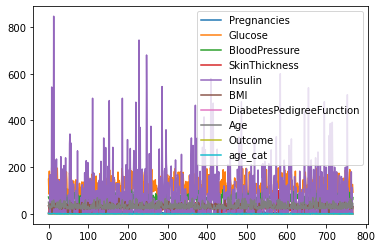

In [4]:
df.plot()
plt.show()

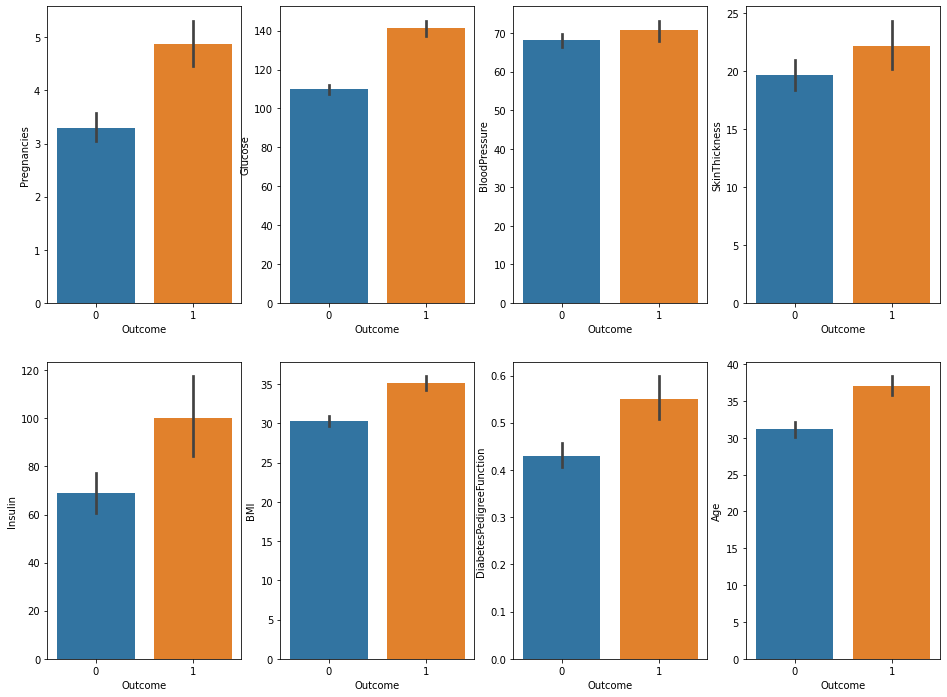

In [5]:
fig = plt.figure(figsize=(16,12))

plt.subplot(2, 4, 1)
sns.barplot(x="Outcome", y="Pregnancies", data=df)

plt.subplot(2, 4, 2)
sns.barplot(x="Outcome", y="Glucose", data=df)

plt.subplot(2, 4, 3)
sns.barplot(x="Outcome", y="BloodPressure", data=df)

plt.subplot(2, 4, 4)
sns.barplot(x="Outcome", y="SkinThickness", data=df)

plt.subplot(2, 4, 5)
sns.barplot(x="Outcome", y="Insulin", data=df)

plt.subplot(2, 4, 6)
sns.barplot(x="Outcome", y="BMI", data=df)

plt.subplot(2, 4, 7)
sns.barplot(x="Outcome", y="DiabetesPedigreeFunction", data=df)

plt.subplot(2, 4, 8)
sns.barplot(x="Outcome", y="Age", data=df)

plt.show()

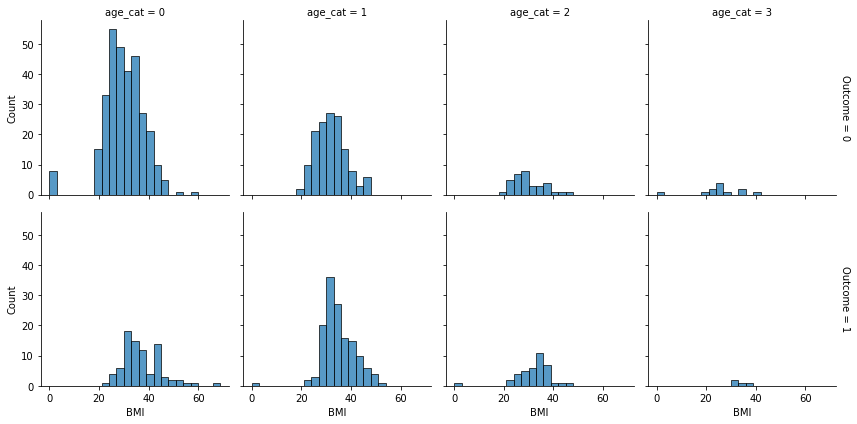

In [6]:
sns.displot(
    df, x="BMI", col="age_cat", row="Outcome",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)
plt.show()

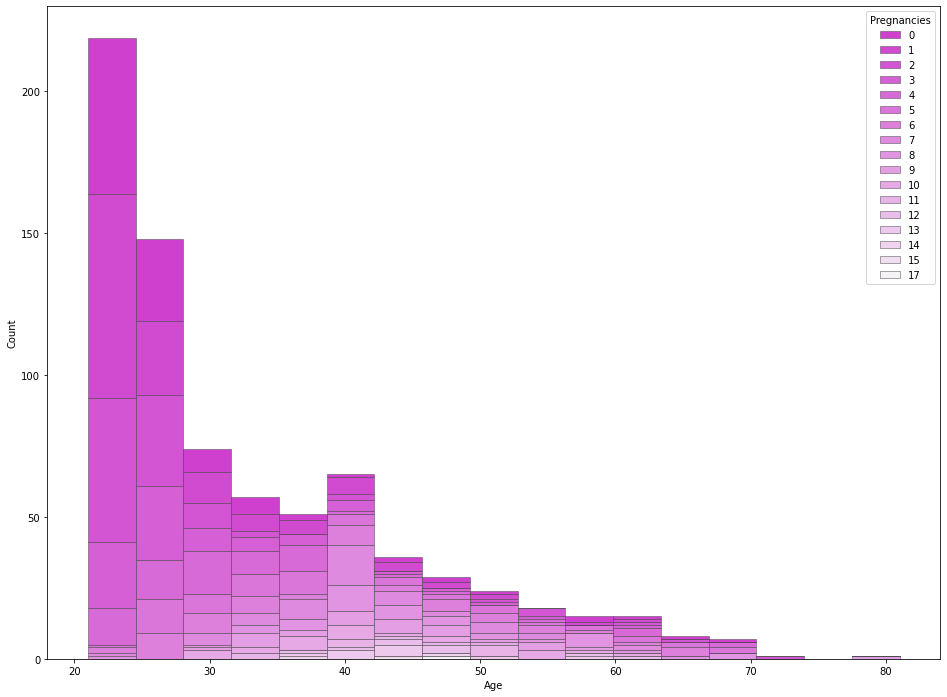

In [7]:
fig = plt.figure(figsize=(16,12))
sns.histplot(
    df,
    x="Age", hue="Pregnancies",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5
)
plt.show()

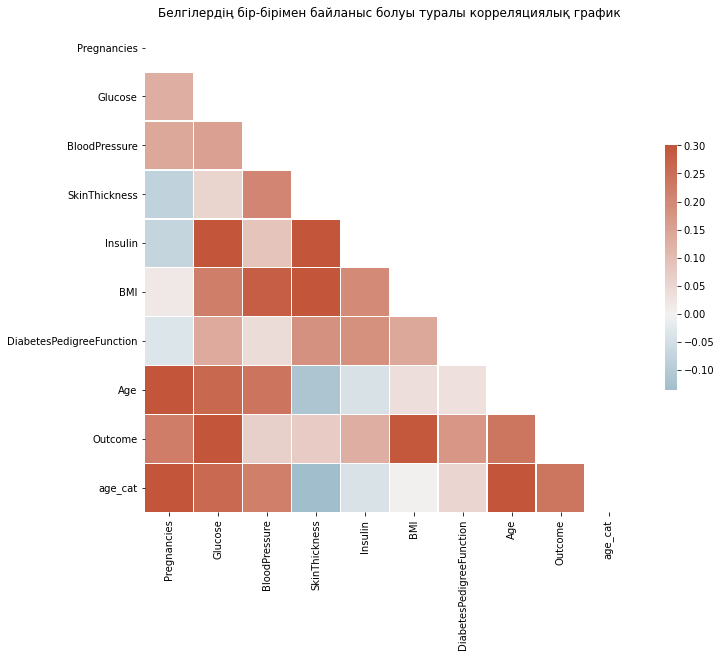

In [8]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Белгілердің бір-бірімен байланыс болуы туралы корреляциялық график')
plt.show()

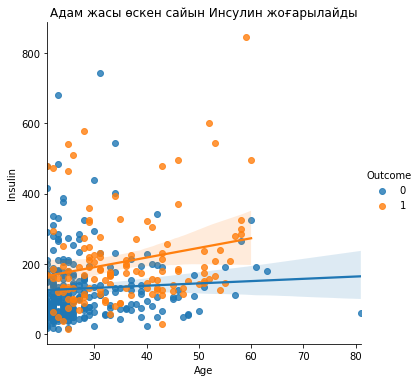

In [9]:
ax = sns.lmplot(
    data=df[df['Insulin'] != 0],
    x="Age", y="Insulin", hue="Outcome",
    height=5
)
plt.title('Адам жасы өскен сайын Инсулин жоғарылайды')
plt.show()

In [10]:
X = df.iloc[:, :-2].values
y = df.iloc[:, 8].values

# Датаны оқыту мен тестке бөлу

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)

(614, 8)
(154, 8)


# Белгілерді масштабтау

In [12]:
import itertools

def plot_classification_report(classificationReport,
                               title='Classification report',
                               cmap='Greens'):
    df = pd.DataFrame(classificationReport).T.iloc[:,:3]
    df.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'9', :'f1-score'])
    return df

In [13]:
target_names = ['Диабет емес', 'Диабет']

# Жаттықтыру

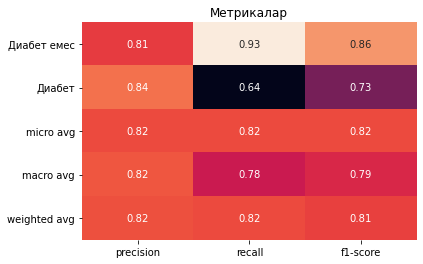

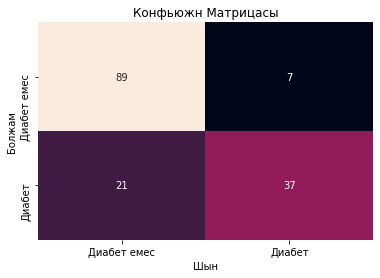

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

sns.heatmap(plot_classification_report(classification_report(y_test, predictions, output_dict=True, target_names=target_names)),
            square=False, annot=True, cbar=False)
plt.title('Метрикалар')
plt.show()

sns.heatmap(confusion_matrix(y_test, predictions), square=False, annot=True, cbar=False,
            xticklabels=target_names,
            yticklabels=target_names)
plt.title('Конфьюжн Матрицасы')
plt.xlabel('Шын')
plt.ylabel('Болжам')
plt.show()

In [15]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.1)
print(X_tr.shape)
print(X_val.shape)

(552, 8)
(62, 8)


In [16]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(256, input_dim=X_tr.shape[1], activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
20/20 [==============================] - 0s 9ms/step - loss: 1.6237 - accuracy: 0.5603 - val_loss: 0.9666 - val_accuracy: 0.5806
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.8784 - accuracy: 0.6221 - val_loss: 0.6434 - val_accuracy: 0.6774
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6872 - accuracy: 0.6401 - val_loss: 0.6143 - val_accuracy: 0.6774
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6161 - accuracy: 0.6726 - val_loss: 0.6654 - val_accuracy: 0.6935
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6231 - accuracy: 0.6694 - val_loss: 0.6198 - val_accuracy: 0.6452
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.7083 - accuracy: 0.6433 - val_loss: 0.7610 - val_accuracy: 0.6613
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6786 - accuracy: 0.6645 - val_loss: 0.6390 - val_accuracy: 0.6935
Epoch 8/100
2

Epoch 59/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4939 - accuracy: 0.7638 - val_loss: 0.6319 - val_accuracy: 0.6452
Epoch 60/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4772 - accuracy: 0.7622 - val_loss: 0.5719 - val_accuracy: 0.6774
Epoch 61/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4883 - accuracy: 0.7606 - val_loss: 0.5614 - val_accuracy: 0.6613
Epoch 62/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4813 - accuracy: 0.7736 - val_loss: 0.5888 - val_accuracy: 0.6774
Epoch 63/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4896 - accuracy: 0.7606 - val_loss: 0.6888 - val_accuracy: 0.7097
Epoch 64/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5141 - accuracy: 0.7476 - val_loss: 0.6446 - val_accuracy: 0.6935
Epoch 65/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4799 - accuracy: 0.7801 - val_loss: 0.5875 - val_accuracy: 0.6774
Epoch 

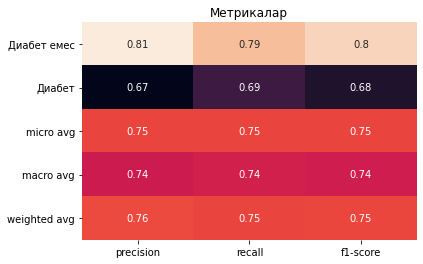

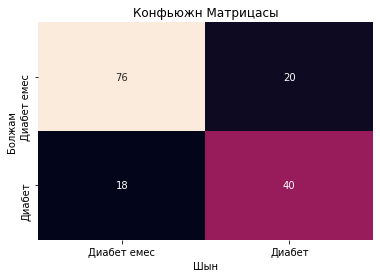

In [17]:
predictions = np.round(model.predict(X_test))

sns.heatmap(plot_classification_report(classification_report(y_test, predictions, output_dict=True, target_names=target_names)),
            square=False, annot=True, cbar=False)
plt.title('Метрикалар')
plt.show()

sns.heatmap(confusion_matrix(y_test, predictions), square=False, annot=True, cbar=False,
            xticklabels=target_names,
            yticklabels=target_names)
plt.title('Конфьюжн Матрицасы')
plt.xlabel('Шын')
plt.ylabel('Болжам')
plt.show()

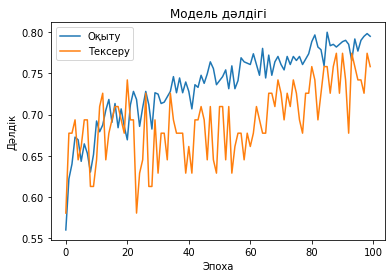

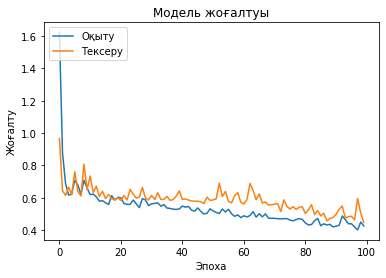

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Модель дәлдігі')
plt.ylabel('Дәлдік')
plt.xlabel('Эпоха')
plt.legend(['Оқыту', 'Тексеру'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Модель жоғалтуы')
plt.ylabel('Жоғалту')
plt.xlabel('Эпоха')
plt.legend(['Оқыту', 'Тексеру'], loc='upper left')
plt.show()